In [1]:
import cv2
import numpy as np
import pandas as pd
import imutils
import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import Flatten, MaxPool2D
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras import backend as K
# from keras.utils import np_utils
# from sklearn.model_selection import train_test_split


In [2]:
# from firebase import firebase
# from datetime import datetime


In [3]:
def extract_plate(img): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    
    plate="not yet"
    
    #Loads the data required for detecting the license plates from cascade classifier.
    plate_cascade = cv2.CascadeClassifier('indian_license_plate.xml')
    #plate_cascade = cv2.CascadeClassifier('dj_number_plate1.xml')
    #plate_cascade = cv2.CascadeClassifier('C:\\Users\\Jai\\Desktop\\haar\\classifier\\cascade.xml')
    #plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    #plate_cascade = cv2.CascadeClassifier('haarcascade_licence_plate_rus_16stages.xml')
    #plate_cascade = cv2.CascadeClassifier('cars.xml')
    #plate_cascade = cv2.CascadeClassifier('cascade3.xml')
    plate_cascade = cv2.CascadeClassifier('cascade5.xml')
    plate_cascade = cv2.CascadeClassifier('cascade6.xml')

    # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 38)

    for (x,y,w,h) in plate_rect:
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1])) #parameter tuning
        #print(a,b)
        #a=100
        #b=200
        
        plate = plate_img[y:y+h-1, x:x+w-1, :]
        #plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
        #plate = plate_img[y-a:y+h+a, x-b:x+w+b, :]
        
        print(x,y,w,h)
        print("plate_rect",plate_rect.shape)
        #print(plate)
        # finally representing the detected contours by drawing rectangles around the edges.
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3)

    plt.imshow(plate_img)
    plt.show()
    if(plate!="not yet"):
        plt.imshow(plate)
        plt.show()    
    return plate_img, plate # returning the processed image



def clean(s):
    ss=""
    for j in range(0,len(s)):
        i=s[j]
        if (ord(i)>=48 and ord(i)<=57) or (ord(i)>=65 and ord(i)<=90):
            #print(i,ord(i))
            ss+=i
    return ss



i= 1 


test1.jpg
Running


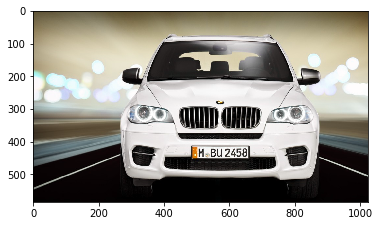

486 411 196 44
plate_rect (1, 4)


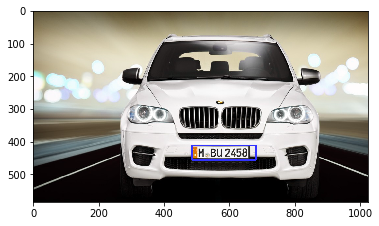

c:\users\jai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


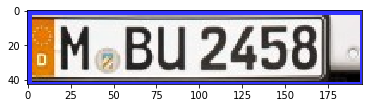

c:\users\jai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


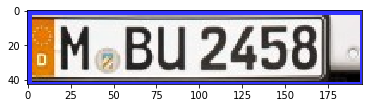

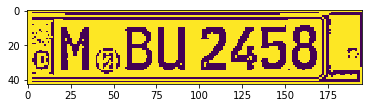

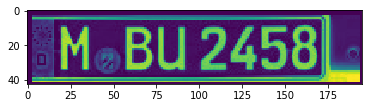

Number is : MBU2458


i= 2 


test2.jpg
Running


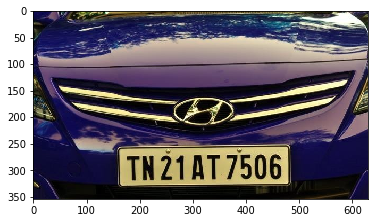

148 263 335 74
plate_rect (1, 4)


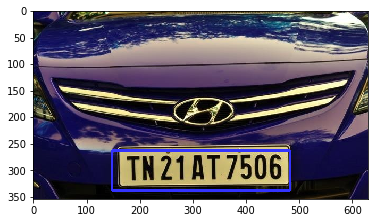

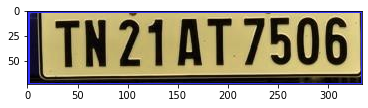

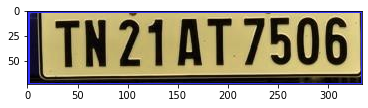

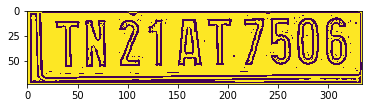

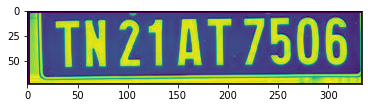

Number is : TN21AT7506


i= 3 


test3.jpg
Running


i= 4 


test4.jpg
Running


i= 5 


test5.jpg
Running


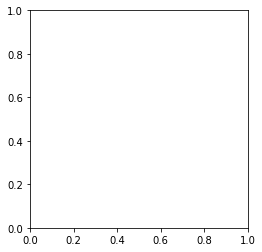

In [12]:
# p,f=plt.subplots(1,2)
try:
    for i in range(1,6):
        
        print("\n\ni=",i,"\n\n")
        try:
            c_img=cv2.imread("C:\\Users\\Jai\\Desktop\\cars\\car"+str(i)+".jpg")
#             plt.imshow(c_img)
#             plt.show()
            print("test"+str(i)+".jpg")
        except:
            try:
                c_img=cv2.imread("C:\\Users\\Jai\\Desktop\\cars\\car"+str(i)+".jpeg") 
            except:
                c_img=cv2.imread("C:\\Users\\Jai\\Desktop\\cars\\car"+str(i)+".jfif") 
                pass
            pass
        
        try:
            print("Running")
            plt.imshow(c_img)
            plt.show()
            car,p=extract_plate(c_img)
            
#             print("SHOWING CAR")
#             plt.imshow(car)
#             plt.show()
            
            if p!="not yet":
                plt.imshow(p)
                plt.show()

            # Give black and white image to tesseract and not multicolor
            plate=p.copy()
#             plt.imshow(plate)
#             plt.show()
            
            nimg=cv2.cvtColor(plate.copy(), cv2.COLOR_BGR2GRAY)
            nimg = cv2.adaptiveThreshold(nimg.copy(), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
#             print("adaptive thresholding image")
            plt.imshow(nimg)
            plt.show()

            thresh = cv2.split(cv2.cvtColor(plate.copy(), cv2.COLOR_BGR2HSV))[2]
            thresh = cv2.bitwise_not(thresh)
#             print("thresh image")
            plt.imshow(thresh)
            plt.show()

            import pytesseract
            pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"
            text=pytesseract.image_to_string(nimg,lang="eng")
            clean(text)
            #print("Number is :", text)

            text=pytesseract.image_to_string(thresh,lang="eng")
            clean(text)
            #print("Number is :", text)

            text=pytesseract.image_to_string(plate,lang="eng")
            text=clean(text)
            print("Number is :", text)
        except:
            pass
except:
    print("ERROR")
    pass


In [86]:
from firebase import firebase
from datetime import datetime

site = "https://parking-db-fef4d.firebaseio.com/"
db = "/python-db-fef4d/"

firebase = firebase.FirebaseApplication(site, None)

data = {
    "TN21AT7506":"",
    "MH12JC2813":""
}

firebase.put(db+"residents/", 'vehicleIDs', data)

guestData = {
    "MBU2458":"",
    "TN38BW1139":""
    
}

firebase.put(db+"guests/", 'vehicleIDs', guestData)


fetch = firebase.get(db,'')


guestDict = fetch['guests']['vehicleIDs']
residentDict = fetch['residents']['vehicleIDs']


datetime.now().strftime("%H:%M:%S")


ModuleNotFoundError: No module named 'Crypto'